In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('train.csv').as_matrix()

C:\Users\prathmesh.dali\AppData\Local\Continuum\miniconda3\envs\latest-tf\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [3]:
img_shape=(64,84)
dataset_sz = 2000
max_digits_per_image = 3

In [4]:
np.random.seed(1234)

In [5]:
def combine(single_images,max_digits_per_image, canvas_sz):
    # Number (random) of digits to be combined between 1 and max_digits_per_image.
    nb_digits = np.random.randint(low=2,high=max_digits_per_image+1)
    # Indices (random) of digit images to be combined.
    rand_indices = np.random.randint(0,len(single_images),nb_digits)
    
    src_images = single_images[rand_indices,1:]
    src_labels = single_images[rand_indices,0 ]
    
    # Segmented output image once channel per digit.
    labels  = np.zeros([*canvas_sz,10],dtype=single_images.dtype)
    
    for i in range(nb_digits):
        x_off_start = np.random.randint(i*28,i*28+10)
        y_off_start = np.random.randint(0,canvas_sz[0]-28+1)
        
        x_off_end = x_off_start + 28
        y_off_end = y_off_start + 28
        
        if x_off_end <= canvas_sz[1] and y_off_end <= canvas_sz[0]:
            src_img = src_images[i].reshape([28,28])
            src_digit = src_labels[i]
            labels[y_off_start:y_off_end, x_off_start:x_off_end,src_digit] = src_img
            
    canvas = np.max(labels, axis=2)
    labels = np.clip(labels, a_min = 0, a_max = 1)
        
    return canvas, labels
        
    

In [6]:
combined = []
segmented = []

In [7]:
for i in range(dataset_sz):
    img, segments = combine(data,max_digits_per_image, img_shape)
    combined.append(img)
    segmented.append(segments)

In [8]:
np.save('combined.npy',combined)
np.save('segmented.npy',segmented)

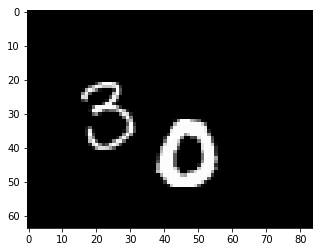

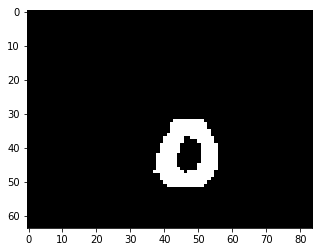

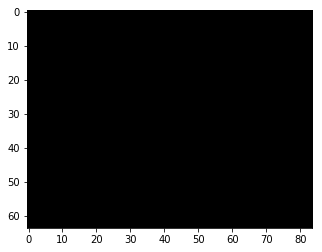

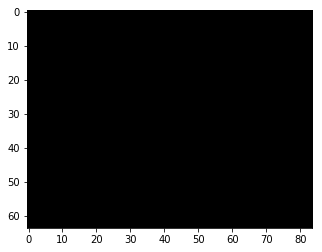

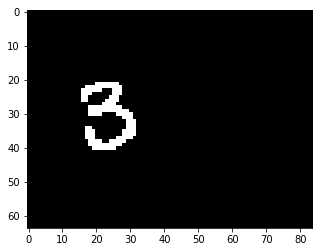

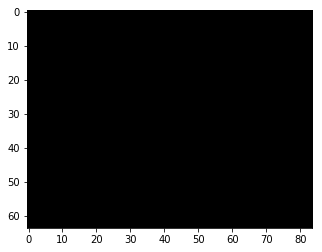

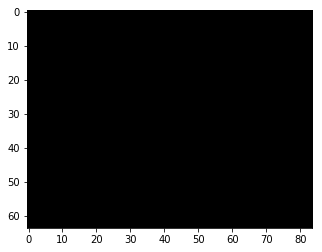

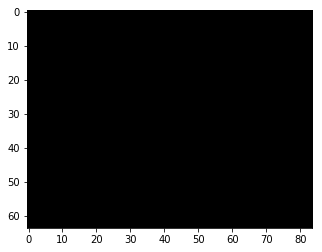

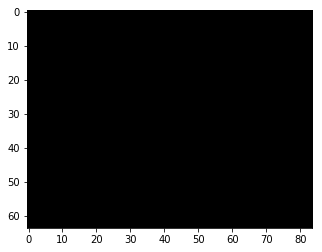

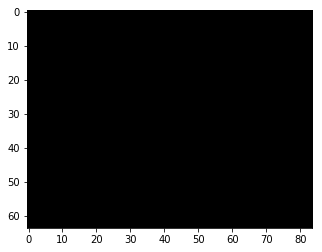

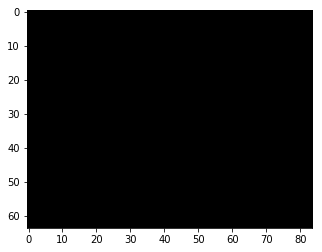

In [10]:
rand_index = np.random.randint(0,len(combined))
c,s = combined[rand_index], segmented[rand_index]

plt.imshow(c, cmap='gray')
plt.show()

for i in range(10):
    plt.imshow(s[:,:,i],cmap='gray')
    plt.show()